In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


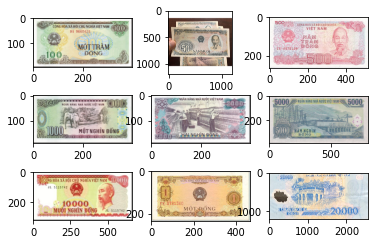

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder='/content/drive/MyDrive/Colab Notebooks/TienGiay/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'tien.'+str(i+1)+'.jpg'
  image=imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder='/content/drive/MyDrive/Colab Notebooks/TienGiay/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('tien.0'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('tien.1'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('tien.2'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('tien.3'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10TienGiay_photos.npy', photos)
save('10TienGiay_labels.npy', labels)

(4, 200, 200, 3) (4,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(11, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
 history = model.fit(photos, labels, epochs=20, verbose=1)

Epoch 1/20
1/1 [==============================] - 1s 983ms/step - loss: 38.8998 - accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 255ms/step - loss: 3098.2725 - accuracy: 0.2500
Epoch 3/20
1/1 [==============================] - 0s 255ms/step - loss: 3337.3250 - accuracy: 0.2500
Epoch 4/20
1/1 [==============================] - 0s 242ms/step - loss: 1961.3127 - accuracy: 0.2500
Epoch 5/20
1/1 [==============================] - 0s 239ms/step - loss: 578.5265 - accuracy: 0.2500
Epoch 6/20
1/1 [==============================] - 0s 250ms/step - loss: 392.0571 - accuracy: 0.2500
Epoch 7/20
1/1 [==============================] - 0s 251ms/step - loss: 340.6460 - accuracy: 0.2500
Epoch 8/20
1/1 [==============================] - 0s 240ms/step - loss: 91.8833 - accuracy: 0.5000
Epoch 9/20
1/1 [==============================] - 0s 236ms/step - loss: 16.5869 - accuracy: 0.7500
Epoch 10/20
1/1 [==============================] - 0s 241ms/step - loss: 64.7649 - accuracy: 0.7

In [ ]:
model.evaluate(photos,labels)

1/1 [==============================] - 0s 201ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [ ]:
model.save('10TienGiayFinal.h5')

In [ ]:
from keras.models import load_model
models=load_model('10TienGiayFinal.h5')

In [ ]:
classes = ["200dong","100dong","50dong","500dong","1000dong","2000dong","500dong","10000dong","1dong","20000dong"]

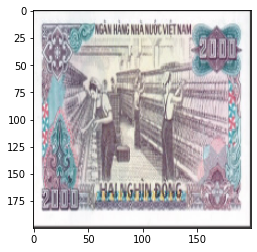

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('2k.jpg', target_size=(200,200))
plt.imshow(img)

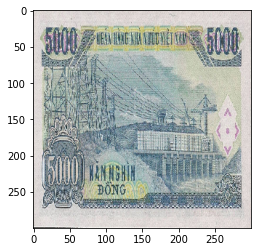

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('5k.jpg', target_size=(300,300))
plt.imshow(img)

In [ ]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]